## Mounting Google Colab into Google Drive to access our Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd /content/drive/My Drive/TickerSoft

/content/drive/My Drive/TickerSoft


## Cloning the repository and Unzip the Data

In [0]:
!git clone https://github.com/anujshah1003/Transfer-Learning-in-keras---custom-data

In [0]:
!unzip data.zip

## Importing the Required Modules

In [0]:
import numpy as np
import os
import time
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
#from imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

## Loading the Data

In [0]:
PATH = os.getcwd()
# Define data path
data_path = PATH + '/data'
data_dir_list = os.listdir(data_path)

img_data_list=[]

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		img_path = data_path + '/'+ dataset + '/'+ img
		img = image.load_img(img_path, target_size=(224, 224))
		x = image.img_to_array(img)
		#x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
#		x = x/255
		print('Input image shape:', x.shape)
		img_data_list.append(x)

In [10]:
img_data = np.array(img_data_list)
img_data.shape

(808, 224, 224, 3)

In [0]:
img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

(808, 1, 224, 224, 3)
(1, 808, 224, 224, 3)
(808, 224, 224, 3)


In [11]:
for folder in os.listdir('data'):
  print(len(os.listdir('data/'+folder)))

202
202
202
202


## Defining the Number of Classes and Defining the Label

In [0]:
# Define the number of classes
num_classes = 4
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:202]=0
labels[202:404]=1
labels[404:606]=2
labels[606:]=3

names = ['cats','dogs','horses','humans']

## Splitting the Data into train and test set

In [0]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

## Loading the pretrained VGG16 model.

In [14]:
# Custom_vgg_model_1
#Training the classifier alone
image_input = Input(shape=(224, 224, 3))

model = VGG16(weights='imagenet', include_top=True)
model.summary()

W0706 18:32:16.443650 140207104735104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0706 18:32:16.470664 140207104735104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 18:32:16.476476 140207104735104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0706 18:32:16.506103 140207104735104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0706 18:32:18.139664 140207104735104 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [15]:
# We remove the last 
model.layers.pop()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
model_output = model.get_layer('fc2').output
output = Dense(num_classes, activation='softmax', name='output')(model_output)

In [0]:
new_model = Model(inputs=model.input, outputs=output)

In [0]:
for layer in new_model.layers[:-1]:
  layer.trainable = False

In [21]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
# Lets check our layers are now not trainable
new_model.layers[3].trainable

False

In [22]:
# Lets compile the model
new_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

W0706 18:33:22.115114 140207104735104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [23]:
# Lets note down our time to train the model
t = time.time()
history = new_model.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (time.time()-t))

W0706 18:33:25.263909 140207104735104 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 646 samples, validate on 162 samples
Epoch 1/12
646/646 [==============================] - 10s 15ms/step - loss: 0.2881 - acc: 0.8978 - val_loss: 0.0932 - val_acc: 0.9630
Epoch 2/12
646/646 [==============================] - 4s 6ms/step - loss: 0.0380 - acc: 0.9861 - val_loss: 0.0938 - val_acc: 0.9815
Epoch 3/12
646/646 [==============================] - 4s 6ms/step - loss: 0.0124 - acc: 0.9954 - val_loss: 0.0971 - val_acc: 0.9815
Epoch 4/12
646/646 [==============================] - 4s 6ms/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0913 - val_acc: 0.9815
Epoch 5/12
646/646 [==============================] - 4s 6ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0681 - val_acc: 0.9877
Epoch 6/12
646/646 [==============================] - 4s 6ms/step - loss: 5.5485e-04 - acc: 1.0000 - val_loss: 0.1067 - val_acc: 0.9753
Epoch 7/12
646/646 [==============================] - 4s 6ms/step - loss: 1.9548e-04 - acc: 1.0000 - val_loss: 0.0818 - val_acc: 0.9815
Epoch 8/12
646/646 [

In [24]:
# Lets evaluate our model
(loss, accuracy) = new_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

162/162 [==============================] - 2s 14ms/step


In [25]:
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

[INFO] loss=0.1237, accuracy: 98.1481%


# Lets fine tune our model by training the linear classifiers. 

In [0]:
image_input = Input(shape=(224, 224, 3))

model =  VGG16(weights='imagenet', include_top=True)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
last_output = model.get_layer('block5_pool').output
x = Flatten(name='flatten')(last_output)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)

tuned_model = Model(inputs=model.input, outputs=out)

In [0]:
tuned_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
for layer in tuned_model.layers[:-3]:
  layer.trainable = False

In [0]:
tuned_model.layers[3].trainable

False

In [0]:
tuned_model.layers[-2].trainable 

True

In [0]:
tuned_model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [0]:
t = time.time()

history_1 = tuned_model.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))

print('Training time: %s' % (time.time()-t))

Train on 646 samples, validate on 162 samples
Epoch 1/12
646/646 [==============================] - 4s 7ms/step - loss: 5.5999 - acc: 0.6223 - val_loss: 4.6763 - val_acc: 0.7099
Epoch 2/12
646/646 [==============================] - 4s 6ms/step - loss: 3.7916 - acc: 0.7554 - val_loss: 0.8228 - val_acc: 0.9383
Epoch 3/12
646/646 [==============================] - 4s 6ms/step - loss: 0.9421 - acc: 0.9303 - val_loss: 0.7967 - val_acc: 0.9506
Epoch 4/12
646/646 [==============================] - 4s 6ms/step - loss: 0.8192 - acc: 0.9427 - val_loss: 0.6551 - val_acc: 0.9506
Epoch 5/12
646/646 [==============================] - 4s 6ms/step - loss: 0.4176 - acc: 0.9690 - val_loss: 0.7960 - val_acc: 0.9506
Epoch 6/12
646/646 [==============================] - 4s 6ms/step - loss: 0.3218 - acc: 0.9783 - val_loss: 0.8264 - val_acc: 0.9444
Epoch 7/12
646/646 [==============================] - 4s 6ms/step - loss: 0.2722 - acc: 0.9737 - val_loss: 1.2400 - val_acc: 0.9198
Epoch 8/12
646/646 [==========

In [0]:
(loss, accuracy) = tuned_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


162/162 [==============================] - 1s 7ms/step
[INFO] loss=0.4258, accuracy: 96.2963%


# Visualizing the Losses

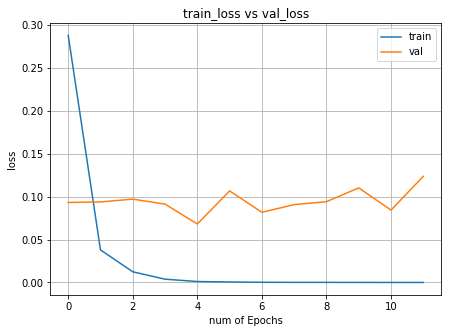

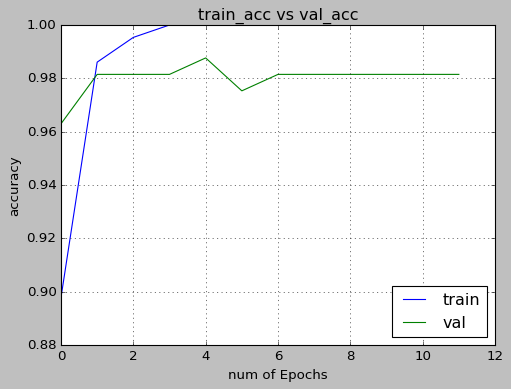

In [49]:
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['acc']
val_acc=history.history['val_acc']
xc=range(12)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


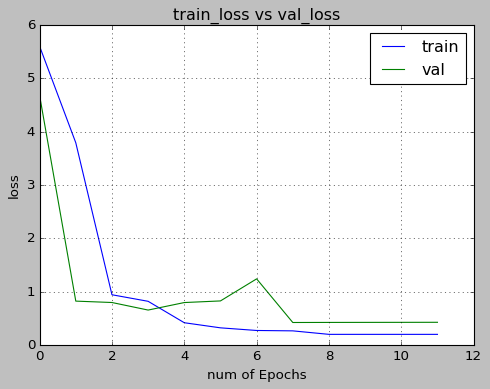

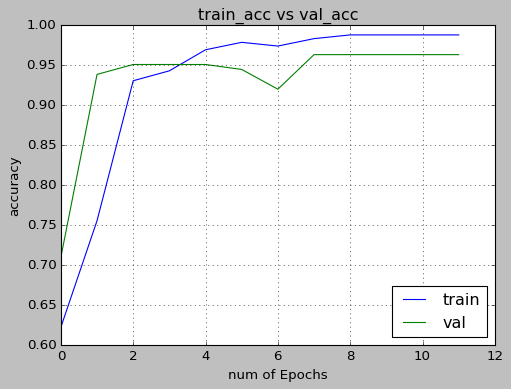

In [0]:
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=history_1.history['loss']
val_loss=history_1.history['val_loss']
train_acc=history_1.history['acc']
val_acc=history_1.history['val_acc']
xc=range(12)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


# Saving and Loading a keras model in .h5 format

In [0]:
# Saving the both weights and architecure 
from keras.models import load_model
new_model.save('model.h5')


# Loading the both weights and architecure 
model = load_model('model.h5')

In [0]:
# Saving the weights and architecture seperately

# save as architecture in JSON
json_string = new_model.to_json()

with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save the weights in .h5 format
new_model.save_weights('model_weights.h5')

# Loading the weights and architecture seperately
json_file = open('model_architecture.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model_weights.h5")

In [0]:
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

## Prediction 

In [0]:
img = image.load_img('horse.jpg', target_size=(224, 224))

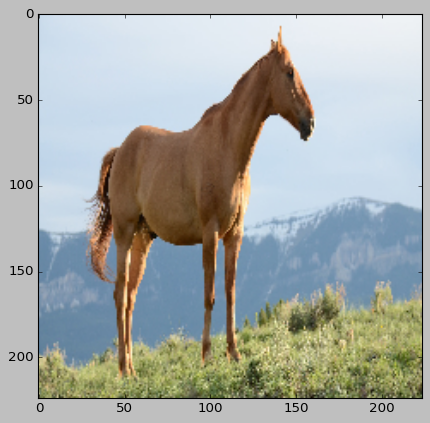

In [52]:
plt.imshow(img)

In [38]:
img = image.img_to_array(img)
img.shape

(224, 224, 3)

In [0]:
img = preprocess_input(img)

In [0]:
img = np.expand_dims(img,axis=0)

In [41]:
img.shape

(1, 224, 224, 3)

In [0]:
pred = new_model.predict(img)

In [0]:
idx = np.argmax(pred)

In [46]:
# names = ['cats','dogs','horses','humans'] -> what we defined above, so our prediction is correct
idx

2